## Project Description: Twitter US Airline Sentiment
### Data Description:
### A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and
### contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons 
### (such as "late flight" or "rude service").
## Submitted by: Kingshuk Banerjee


### Import basic libraries and load the dataset

In [1]:
import pandas as pd 
pd.options.display.max_colwidth = 100

In [2]:
data = pd.read_csv('Tweets.csv')

In [3]:
data.shape

(14640, 15)

In [4]:
data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &...",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### There are different parameters captured for each tweet like negative_reason, confidence, airline name, time of tweet etc.
### As per the problem definition of this classification task, we will keep only the tweet text and the sentiment labels. 

In [5]:
data = data[['airline_sentiment', 'text']]
data.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &..."
4,negative,@VirginAmerica and it's a really big bad thing about it


In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

### Lets look at the spread of the sentiments

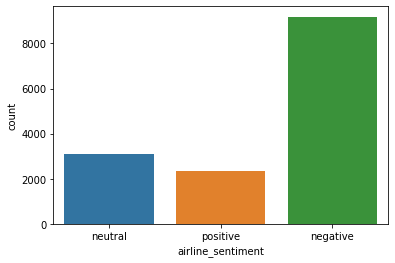

In [7]:
sns.countplot(data['airline_sentiment'])

In [8]:
data['airline_sentiment'].value_counts(normalize=True, dropna=False)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

### 63% reviews are negative. Hence the dataset is imbalanced, but not so much. 
### In this case, the recall will be important parameter for each of the sentiment types.
### Moreover this has to be modeled as a multi-class classification problem. 

In [9]:
tweets = data['text']
tweets

0                                                                        @VirginAmerica What @dhepburn said.
1                                   @VirginAmerica plus you've added commercials to the experience... tacky.
2                                    @VirginAmerica I didn't today... Must mean I need to take another trip!
3        @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &...
4                                                    @VirginAmerica and it's a really big bad thing about it
                                                        ...                                                 
14635                                        @AmericanAir thank you we got on a different flight to Chicago.
14636    @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 ...
14637                                           @AmericanAir Please bring American Airlines to #BlackBerry10
14638    @AmericanA

### Lets look at the shortest and longest tweets


In [10]:
tweets.str.len().sort_values()

988       12
3657      12
3131      12
2101      12
2102      12
        ... 
12208    167
8359     167
11665    170
11807    176
10405    186
Name: text, Length: 14640, dtype: int64

In [11]:
print('The shortest tweet is \"{}\" and its sentiment is \"{}\"'.format(tweets[988], data['airline_sentiment'][988]))
print('The longest tweet is \"{}\" and its sentiment is \"{}\"'.format(tweets[10405], data['airline_sentiment'][10405]))

The shortest tweet is "@united done" and its sentiment is "neutral"
The longest tweet is "@USAirways Eyyyy! Cancelled Flightlations, Flight Booking Problemss, reFlight Booking Problemss, but y'all got me on the same flight out tonight (not tomorrow) &amp; the FC upgrade. Thx!" and its sentiment is "positive"


### print a few positive, negative and neutral tweets

In [12]:
positive = data[data['airline_sentiment'] == 'positive']
positive.head(5)

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."
11,positive,@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D


In [13]:
negative = data[data['airline_sentiment'] == 'negative']
negative.head(5)

,airline_sentiment,text
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &..."
4,negative,@VirginAmerica and it's a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's r...
15,negative,@VirginAmerica SFO-PDX schedule is still MIA.
17,negative,@VirginAmerica I flew from NYC to SFO last week and couldn't fully sit in my seat due to two la...


In [14]:
neutral = data[data['airline_sentiment'] == 'neutral']
neutral.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.c..."
10,neutral,@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24
23,neutral,@VirginAmerica will you be making BOS&gt;LAS non stop permanently anytime soon?


In [15]:
data['length_of_tweets'] = data['text'].apply(lambda x: len(x.split(' ')))
data.head()

,airline_sentiment,text,length_of_tweets
0,neutral,@VirginAmerica What @dhepburn said.,4
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,9
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,12
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &...",17
4,negative,@VirginAmerica and it's a really big bad thing about it,10


In [16]:
data.groupby('airline_sentiment')['length_of_tweets'].describe()

,count,mean,std,min,25%,50%,75%,max
airline_sentiment,,,,,,,,
negative,9178.0,19.844520,5.997104,2.0,16.0,21.0,24.0,36.0
neutral,3099.0,14.515650,7.023248,2.0,9.0,14.0,20.0,32.0
positive,2363.0,14.138383,7.108085,2.0,8.0,14.0,20.0,31.0


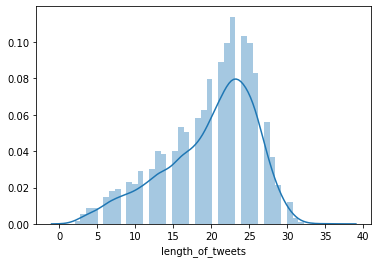

In [17]:
sns.distplot(data[data['airline_sentiment'] == 'negative']['length_of_tweets'])

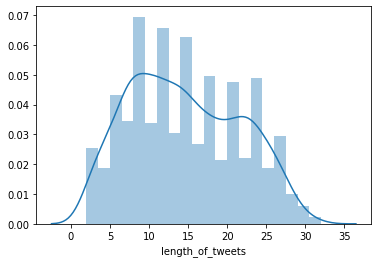

In [18]:
sns.distplot(data[data['airline_sentiment'] == 'neutral']['length_of_tweets'])

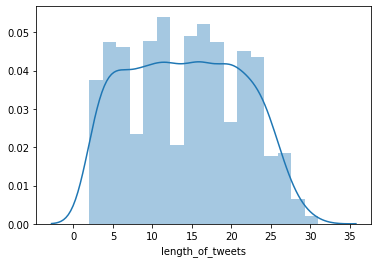

In [19]:
sns.distplot(data[data['airline_sentiment'] == 'positive']['length_of_tweets'])

### We can see that typically the tweets are 15-20 words long on average. 
### However there are 2 word tweets also for each category. This shows we have to be careful in removing any words.
### End of Data exploration.

## Data preprocessing
### We will first define functions and test them on dummy text to make sure they are handling the preprocessing task. 
### Then these functions will be applied sequentially to the whole dataset of tweets to clean the tweets. 

In [20]:
# remove html tags and web characters, if any. 
from bs4 import BeautifulSoup
import re
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    # remove url heads
    url_head = r'https://'
    stripped_text = re.sub(url_head, '', stripped_text)
    url_head = r'http://'
    stripped_text = re.sub(url_head, '', stripped_text)
    url_head = r'www.'
    stripped_text = re.sub(url_head, '', stripped_text)
    url_head = r'.com'
    stripped_text = re.sub(url_head, '', stripped_text)
    url_head = r'.org'
    stripped_text = re.sub(url_head, '', stripped_text)
    return stripped_text
# test code
print(remove_html_tags('It is <br> difficult </br> to believe when <your/> belief is not so believing to others'))
print(remove_html_tags('https://www.google.com says I am lucky'))

It is  difficult  to believe when  belief is not so believing to others
google says I am lucky


In [21]:
# remove the @<mention> tags for airline names. These are irrelevant for the problem. 
def remove_mention(text):
    text = re.sub('@\w+', '', text)
    return text
# test code
print(remove_mention("@VirginAmerica plus you've added @Southwest like commercials"))

 plus you've added  like commercials


In [22]:
#remove accented characters although these tweets may not have any. 
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
# test code
print(remove_accented_chars('It is difficült tœ beliêve when your belief is not sò believīng to others'))

It is difficult t believe when your belief is not so believing to others


In [23]:
#remove special characters and numbers
import re
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text
# test code
print(remove_special_characters('#It is difficult $ to believe @when yo%ur belief is **not so believing 456 to others'))
print(remove_special_characters('I was born in 1985 with the world cup being played for 30 days', True))

It is difficult  to believe when your belief is not so believing 456 to others
I was born in  with the world cup being played for  days


In [24]:
# another function to remove any remaining digits and punctuation
import string
def remove_punctuation_and_digits(text):
    exclist = string.punctuation + string.digits
    table_ = str.maketrans('','',exclist)
    ret = ' '.join([x.translate(table_) for x in text.split()])
    return ret
# test code
print(remove_punctuation_and_digits("#$% It's a good day # and 12 the sun @# is34 shi'ning bright'ly."))

 Its a good day  and  the sun  is shining brightly


In [25]:
# tokenization 
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
def tokenize(text):
    tokenizer=ToktokTokenizer()
    tokens=tokenizer.tokenize(text)
    return tokens
# test code
print(tokenize('It is difficult to believe when your belief is not so believing to others'))

['It', 'is', 'difficult', 'to', 'believe', 'when', 'your', 'belief', 'is', 'not', 'so', 'believing', 'to', 'others']


In [26]:
# remove stop words but keep the no, not for negative sentiments
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
def remove_stopwords(tokens):
    filtered = [t for t in tokens if t not in stopword_list]
    return filtered
# test code
print(remove_stopwords('It is difficult to fly when your flight is not so believing to others.'.split()))

['It', 'difficult', 'fly', 'flight', 'not', 'believing', 'others.']


In [27]:
# stemming
def stemmer(tokens):
    ps = nltk.porter.PorterStemmer()
    stemmed = [ps.stem(t) for t in tokens]
    return stemmed
# test code
print(stemmer('It is difficult to believe when your belief is not so believing to others'.split()))

['It', 'is', 'difficult', 'to', 'believ', 'when', 'your', 'belief', 'is', 'not', 'so', 'believ', 'to', 'other']


In [28]:
# lemmatization
# !pip install spacy
# !python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)
def lemmatize_text(text):
    modified_tokens = nlp(text)
    lemmatized = [word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in modified_tokens]
    return lemmatized
# test code
print(lemmatize_text('It is difficult to believe when your belief is not so believing to others.'))

['It', 'be', 'difficult', 'to', 'believe', 'when', 'your', 'belief', 'be', 'not', 'so', 'believe', 'to', 'other', '.']


### Now we can apply these functions on the tweets
### This is a function to clean a tweet except stemming and lemmatization. 
### It will first lowercase the tweet and then apply the preprocessing functions in sequence to the tweet.

In [29]:
def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = remove_html_tags(tweet)
    tweet = remove_mention(tweet)
    tweet = remove_accented_chars(tweet)
    tweet = remove_special_characters(tweet, True)
    tweet = remove_punctuation_and_digits(tweet)
    tweet_words = tokenize(tweet)
    tweet_words = remove_stopwords(tweet_words)
    return tweet_words

# test code
print(clean_tweet("https://www.google.com CAN sear'ch Where you are. <b> Be Care#$ful ??? <\b> wht you shaRe.. better not Regret later"))

['google', 'search', 'careful', 'wht', 'share', 'better', 'not', 'regret', 'later']


### Preprocess the full dataset

In [30]:
clean_tweets = tweets.apply(lambda x: clean_tweet(x))
clean_tweets

0                                                                                                     [said]
1                                                            [plus, youve, addedmercials, experience, tacky]
2                                                      [didnt, today, must, mean, need, take, another, trip]
3                     [really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]
4                                                                                  [really, big, bad, thing]
                                                        ...                                                 
14635                                                               [thank, got, different, flight, chicago]
14636    [leaving, minutes, late, flight, no, warnings, ormunication, minutes, late, flight, thats, calle...
14637                                                        [please, bring, american, airlines, blackberry]
14638              

### Stemming and lemmatization 
### Store the datasets separately to be applied later to the classification problem.

In [31]:
stemmed_tweets = clean_tweets.apply(lambda x: stemmer(x))
stemmed_tweets[0:4]

0                                                                      [said]
1                                      [plu, youv, addedmerci, experi, tacki]
2                         [didnt, today, must, mean, need, take, anoth, trip]
3    [realli, aggress, blast, obnoxi, entertain, guest, face, littl, recours]
Name: text, dtype: object

In [32]:
lemmatized_tweets = clean_tweets.apply(lambda x: lemmatize_text(' '.join(x)))
lemmatized_tweets[0:4]

0                                                                                   [say]
1                                      [plus, you, have, addedmercial, experience, tacky]
2                                 [do, not, today, must, mean, need, take, another, trip]
3    [really, aggressive, blast, obnoxious, entertainment, guest, face, little, recourse]
Name: text, dtype: object

### Join the tokens (stemmed and lemmatized) to form full text datasets again.

In [33]:
# Printing stemmed and lemmatized tweets at the end of text preprocessing
stemmed = stemmed_tweets.apply(lambda x: ' '.join(x))
lemmatized = lemmatized_tweets.apply(lambda x: ' '.join(x))

In [34]:
stemmed.head(5)

0                                                              said
1                                  plu youv addedmerci experi tacki
2                        didnt today must mean need take anoth trip
3    realli aggress blast obnoxi entertain guest face littl recours
4                                              realli big bad thing
Name: text, dtype: object

In [35]:
lemmatized.head(5)

0                                                                           say
1                                   plus you have addedmercial experience tacky
2                                 do not today must mean need take another trip
3    really aggressive blast obnoxious entertainment guest face little recourse
4                                                          really big bad thing
Name: text, dtype: object

### Lets put these into a dataset to check how the text length distribution has changed.

In [36]:
clean_df = pd.DataFrame({'airline_sentiment': data['airline_sentiment'], 'stemmed_tweets': stemmed, 'lemmatized_tweets': lemmatized})
clean_df.head(5)

,airline_sentiment,stemmed_tweets,lemmatized_tweets
0,neutral,said,say
1,positive,plu youv addedmerci experi tacki,plus you have addedmercial experience tacky
2,neutral,didnt today must mean need take anoth trip,do not today must mean need take another trip
3,negative,realli aggress blast obnoxi entertain guest face littl recours,really aggressive blast obnoxious entertainment guest face little recourse
4,negative,realli big bad thing,really big bad thing


In [37]:
clean_df.groupby('airline_sentiment').describe()

stemmed_tweets                    lemmatized_tweets         \
                           count unique    top freq             count unique   
airline_sentiment                                                              
negative                    9178   9060   suck    4              9178   9060   
neutral                     3099   2957  thank   19              3099   2960   
positive                    2363   2164  thank  121              2363   2169   

                               
                     top freq  
airline_sentiment              
negative            suck    4  
neutral            thank   13  
positive           thank   62

### From the expletives to the gratitude words, it seems we have retained the sentiments in the text. 
### End of text preprocessing

In [38]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
# Prepare the DTM for stemmed
count_vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 3000)
count_vectorizer.fit(stemmed)
features = count_vectorizer.get_feature_names()
print(features[0:10])
trained_stemmed_features_count = count_vectorizer.transform(stemmed)
trained_stemmed_features_count = trained_stemmed_features_count.toarray()
trained_stemmed_features_count.shape

['aa', 'aadvantag', 'abandon', 'abc', 'abil', 'abl', 'aboard', 'abq', 'absolut', 'absurd']


(14640, 3000)

In [40]:
import numpy as np 
counts = np.sum(trained_stemmed_features_count, axis=0)
feature_count_df = pd.DataFrame({'features': features, 'count': counts})
feature_count_df.sort_values(by='count', ascending=False)

,features,count
959,flight,4804
2633,thank,1688
1065,get,1614
1752,not,1558
1730,no,1442
...,...,...
2302,satisfi,3
1153,hangup,3
2304,sauc,3
1307,incl,3


In [41]:
# Prepare the DTM for lemmatized
count_vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 3000)
count_vectorizer.fit(lemmatized)
features = count_vectorizer.get_feature_names()
print(features[0:10])
trained_lemma_features_count = count_vectorizer.transform(lemmatized)
trained_lemma_features_count = trained_lemma_features_count.toarray()
trained_lemma_features_count.shape

['aa', 'aadvantage', 'aas', 'abandon', 'abc', 'ability', 'able', 'aboard', 'abq', 'absolute']


(14640, 3000)

In [42]:
counts = np.sum(trained_lemma_features_count, axis=0)
feature_count_df = pd.DataFrame({'features': features, 'count': counts})
feature_count_df.sort_values(by='count', ascending=False)

,features,count
1007,flight,4648
1758,not,3863
1105,get,2103
2627,thank,1493
1737,no,1442
...,...,...
1171,hangar,3
1173,hanging,3
1174,hangs,3
1175,hangup,3


In [43]:
# Prepare the Tf-Idf vectors also
tfidf = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 3000)
tfidf.fit(stemmed)
features = tfidf.get_feature_names()
print(features[0:10])
trained_stemmed_features_tfidf = tfidf.transform(stemmed)
trained_stemmed_features_tfidf = trained_stemmed_features_tfidf.toarray()
print(trained_stemmed_features_tfidf.shape)
print(trained_stemmed_features_tfidf[0:10])

['aa', 'aadvantag', 'abandon', 'abc', 'abil', 'abl', 'aboard', 'abq', 'absolut', 'absurd']
(14640, 3000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
counts = np.sum(trained_stemmed_features_tfidf, axis=0)
feature_count_df = pd.DataFrame({'features': features, 'count': counts})
feature_count_df.sort_values(by='count', ascending=False)

,features,count
959,flight,685.126130
2633,thank,522.388747
1065,get,317.333085
1752,not,300.240037
1730,no,285.590594
...,...,...
1015,french,1.040219
2253,roast,1.022531
2920,woaw,1.018904
1228,honey,1.017832


In [45]:
tfidf = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 3000)
tfidf.fit(lemmatized)
features = tfidf.get_feature_names()
print(features[0:10])
trained_lemma_features_tfidf = tfidf.transform(lemmatized)
trained_lemma_features_tfidf = trained_lemma_features_tfidf.toarray()
print(trained_lemma_features_tfidf.shape)
print(trained_lemma_features_tfidf[0:10])

['aa', 'aadvantage', 'aas', 'abandon', 'abc', 'ability', 'able', 'aboard', 'abq', 'absolute']
(14640, 3000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [46]:
counts = np.sum(trained_lemma_features_tfidf, axis=0)
feature_count_df = pd.DataFrame({'features': features, 'count': counts})
feature_count_df.sort_values(by='count', ascending=False)

,features,count
1007,flight,670.020152
1758,not,553.850965
2627,thank,442.716086
1105,get,389.282148
1737,no,288.296892
...,...,...
1243,honey,1.081020
1386,isis,1.075950
870,ethiopia,1.055650
319,bkk,0.975489


### From the scores and counts, it seems lemmatized text is yielding more relevant words (not, thank, get) at the top. 

### Process the output labels for classfication modeling

In [47]:
sentiments = data['airline_sentiment']
sentiments.shape

(14640,)

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(sentiments)
sents = le.transform(sentiments)
labels = list(le.classes_)
labels

['negative', 'neutral', 'positive']

In [49]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Function uses XGBClassifier, it gave slightly better performance than RandomForestClassifier
### The function splits the dataset into training and test sets, trains the model and predicts on test data.
### It then prints the resultant confusion matrix and classification report.

In [50]:
def train_and_predict(dataset, sentiments, labels):
    X_train, X_test, Y_train, Y_test = train_test_split(dataset, sentiments, test_size=0.3, random_state=1)
    rf = XGBClassifier(n_jobs=4, n_estimators=100, objective='multi:softmax')
    rf.fit(X_train, Y_train)
    preds = rf.predict(X_test)
    print(classification_report(Y_test, preds, target_names=labels))
    #print(confusion_matrix(Y_test, preds, labels=['0', '1', '2']))
    cm=confusion_matrix(Y_test, preds)
    cmdf = pd.DataFrame(cm, index=['Actual-Negative', 'Actual-Neutral', 'Actual-Positive'], columns=['Predicted-Negative', 'Predicted-Neutral', 'Predicted-Positive'])
    sns.heatmap(cmdf, annot=True, fmt='.0f', cmap='coolwarm')

### Train and predict on all 4 variations of the data [(stemmed, lemmatized) * (countvec, tfidf)]

              precision    recall  f1-score   support

    negative       0.83      0.90      0.86      2741
     neutral       0.63      0.54      0.58       936
    positive       0.74      0.63      0.68       715

    accuracy                           0.78      4392
   macro avg       0.73      0.69      0.71      4392
weighted avg       0.77      0.78      0.77      4392



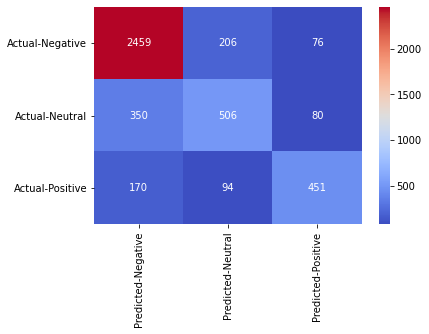

In [51]:
# Lemmatized with Tf-Idf
train_and_predict(trained_lemma_features_tfidf, sents, labels)

              precision    recall  f1-score   support

    negative       0.82      0.89      0.85      2741
     neutral       0.62      0.54      0.57       936
    positive       0.72      0.63      0.67       715

    accuracy                           0.77      4392
   macro avg       0.72      0.68      0.70      4392
weighted avg       0.76      0.77      0.77      4392



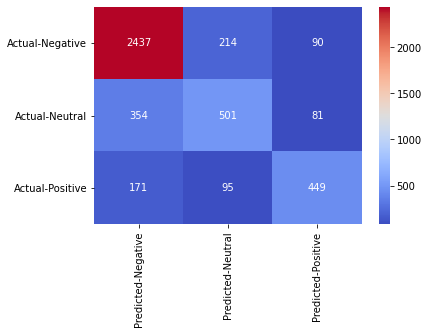

In [52]:
# Lemmatized with CountVectorizer
train_and_predict(trained_lemma_features_count, sents, labels)

              precision    recall  f1-score   support

    negative       0.82      0.90      0.86      2741
     neutral       0.63      0.52      0.57       936
    positive       0.74      0.62      0.68       715

    accuracy                           0.77      4392
   macro avg       0.73      0.68      0.70      4392
weighted avg       0.77      0.77      0.77      4392



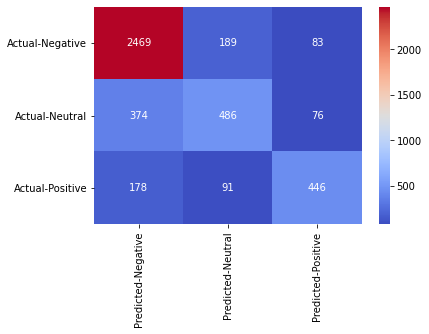

In [53]:
# Stemmed with CountVectorizer
train_and_predict(trained_stemmed_features_count, sents, labels)

              precision    recall  f1-score   support

    negative       0.81      0.91      0.86      2741
     neutral       0.64      0.50      0.56       936
    positive       0.74      0.62      0.68       715

    accuracy                           0.77      4392
   macro avg       0.73      0.68      0.70      4392
weighted avg       0.76      0.77      0.76      4392



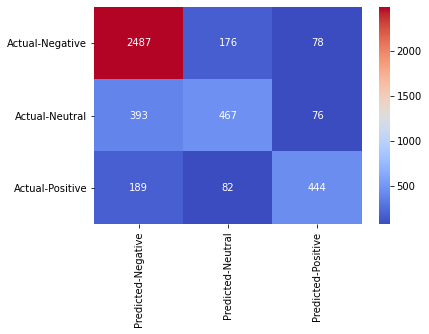

In [54]:
# Stemmed with Tf-Idf
train_and_predict(trained_stemmed_features_tfidf, sents, labels)

### The recall scores for 'negative' sentiments are good. 
### However a lot of the 'neutral' are predicted as 'negative'. This could be because the 'neutral' tweets have words like "didn't" and "missed".
### Similarly quite a lot of 'positive' are predicted as 'negative'. 
### We see the best score with Lemmatized and Tf-Idf, although all the configurations are very close.

In [55]:
neutral.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.c..."
10,neutral,@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24
23,neutral,@VirginAmerica will you be making BOS&gt;LAS non stop permanently anytime soon?


In [56]:
positive.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."
11,positive,@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D


### Lets try a neural network model

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
model = Sequential()
model.add(Dense(1000, input_dim=3000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [59]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(trained_lemma_features_tfidf, sents, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((10248, 3000), (4392, 3000), (10248,), (4392,))

In [61]:
# For neural network, we need one-hot encoding of the output
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)
y_train, y_test

(array([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]], dtype=float32),
 array([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.]], dtype=float32))

In [62]:
early = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
model.fit(X_train, y_train, validation_split=0.2, callbacks=[early], epochs=100)

Epoch 1/100
257/257 [==============================] - 4s 17ms/step - loss: 0.6241 - accuracy: 0.7421 - val_loss: 0.5387 - val_accuracy: 0.7820
Epoch 2/100
257/257 [==============================] - 4s 17ms/step - loss: 0.3512 - accuracy: 0.8686 - val_loss: 0.5917 - val_accuracy: 0.7751
Epoch 3/100
257/257 [==============================] - 4s 16ms/step - loss: 0.1754 - accuracy: 0.9422 - val_loss: 0.7827 - val_accuracy: 0.7595
Epoch 4/100
257/257 [==============================] - 4s 17ms/step - loss: 0.0702 - accuracy: 0.9780 - val_loss: 0.9509 - val_accuracy: 0.7571
Epoch 5/100
257/257 [==============================] - 4s 16ms/step - loss: 0.0359 - accuracy: 0.9902 - val_loss: 1.0855 - val_accuracy: 0.7541
Epoch 6/100
257/257 [==============================] - 4s 17ms/step - loss: 0.0253 - accuracy: 0.9926 - val_loss: 1.1996 - val_accuracy: 0.7595
Epoch 7/100
257/257 [==============================] - 4s 16ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 1.2238 - val_accuracy:

In [63]:
_, acc = model.evaluate(X_test, y_test)
acc

138/138 [==============================] - 1s 4ms/step - loss: 0.5334 - accuracy: 0.7855


0.7855191230773926

In [64]:
preds = model.predict(X_test)
y_hat = np.argmax(preds, axis=1)
y_hat

array([2, 0, 2, ..., 0, 2, 0])

              precision    recall  f1-score   support

    negative       0.83      0.91      0.87      2741
     neutral       0.67      0.49      0.56       936
    positive       0.70      0.71      0.71       715

    accuracy                           0.79      4392
   macro avg       0.73      0.70      0.71      4392
weighted avg       0.78      0.79      0.78      4392



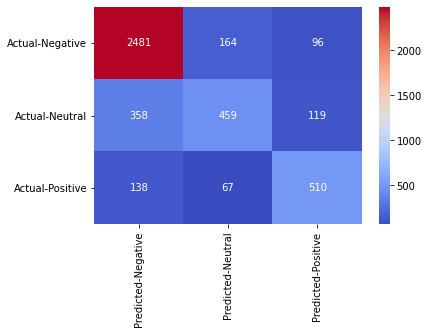

In [65]:
print(classification_report(Y_test, y_hat, target_names=labels))
cm=confusion_matrix(Y_test, y_hat)
cmdf = pd.DataFrame(cm, index=['Actual-Negative', 'Actual-Neutral', 'Actual-Positive'], columns=['Predicted-Negative', 'Predicted-Neutral', 'Predicted-Positive'])
sns.heatmap(cmdf, annot=True, fmt='.0f', cmap='coolwarm')

### From the different models tried and vectorizers (count and Tf-idf), the following can be concluded. 
#### 1. The scores for negative are good, because the data is skewed to this class.
#### 2. The models overfit the training data but achieves about 78% accuracy on test data.
#### 3. With the neural network model, the recall for positive and neutral classes improve. 
#### 4. The choice of vectorizer did not have much impact on the model performance.
#### 5. The model performance can be improved by hyperparameter tuning of classifier, CountVectorizer and Tf-IdfVectorizer.

### Below we try to oversample the neutral and positive classes to correct the imbalance in the data.
### We will use the same neural network model which is defined and compiled above.

In [66]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [67]:
counter = Counter(sents)
print(counter)
over = SMOTE()
X, y = over.fit_resample(trained_lemma_features_tfidf, sents)
counter = Counter(y)
print(counter)

Counter({0: 9178, 1: 3099, 2: 2363})
Counter({1: 9178, 2: 9178, 0: 9178})


In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((19273, 3000), (8261, 3000), (19273,), (8261,))

In [69]:
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)
y_train, y_test

(array([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.]], dtype=float32),
 array([[0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.]], dtype=float32))

In [70]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
model.fit(X_train, y_train, validation_split=0.2, callbacks=[early], epochs=100)

Epoch 1/100
482/482 [==============================] - 8s 16ms/step - loss: 0.4347 - accuracy: 0.8366 - val_loss: 0.3719 - val_accuracy: 0.8661
Epoch 2/100
482/482 [==============================] - 8s 16ms/step - loss: 0.2322 - accuracy: 0.9204 - val_loss: 0.3519 - val_accuracy: 0.8809
Epoch 3/100
482/482 [==============================] - 8s 16ms/step - loss: 0.1127 - accuracy: 0.9632 - val_loss: 0.3891 - val_accuracy: 0.8872
Epoch 4/100
482/482 [==============================] - 8s 17ms/step - loss: 0.0660 - accuracy: 0.9783 - val_loss: 0.4219 - val_accuracy: 0.8988
Epoch 5/100
482/482 [==============================] - 8s 17ms/step - loss: 0.0529 - accuracy: 0.9815 - val_loss: 0.4863 - val_accuracy: 0.8936
Epoch 6/100
482/482 [==============================] - 8s 17ms/step - loss: 0.0414 - accuracy: 0.9859 - val_loss: 0.4918 - val_accuracy: 0.9009
Epoch 7/100
482/482 [==============================] - 8s 17ms/step - loss: 0.0398 - accuracy: 0.9858 - val_loss: 0.5534 - val_accuracy:

In [71]:
_, acc = model.evaluate(X_test, y_test)
acc

259/259 [==============================] - 1s 4ms/step - loss: 0.3645 - accuracy: 0.8780


0.8779808878898621

In [72]:
preds = model.predict(X_test)
y_hat = np.argmax(preds, axis=1)
y_hat

array([2, 2, 1, ..., 1, 2, 1])

              precision    recall  f1-score   support

    negative       0.88      0.89      0.89      2763
     neutral       0.83      0.86      0.85      2716
    positive       0.92      0.88      0.90      2782

    accuracy                           0.88      8261
   macro avg       0.88      0.88      0.88      8261
weighted avg       0.88      0.88      0.88      8261



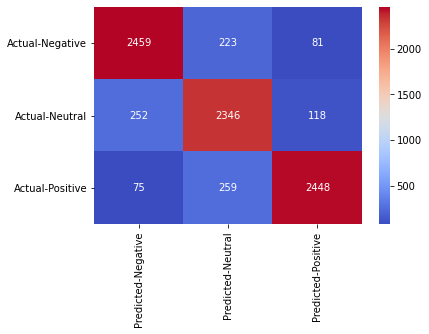

In [73]:
print(classification_report(Y_test, y_hat, target_names=labels))
cm=confusion_matrix(Y_test, y_hat)
cmdf = pd.DataFrame(cm, index=['Actual-Negative', 'Actual-Neutral', 'Actual-Positive'], columns=['Predicted-Negative', 'Predicted-Neutral', 'Predicted-Positive'])
sns.heatmap(cmdf, annot=True, fmt='.0f', cmap='coolwarm')

### With balancing the dataset classes using SMOTE, we can see that recall and F1-score for all classes improved significantly. 
### This proves that all our earlier conclusion about the model were correct. 
### The model has an upper bound of 78% accuracy in the original dataset but improves with synthetic samples of the neutral and positive.

### Lets try a few predictions on created data


In [74]:
cleaned_text = clean_tweet('I got this flight and it turned out so bad that I will never take this airlines again')
cleaned_text = lemmatize_text(' '.join(cleaned_text))
print(cleaned_text)

['get', 'flight', 'turn', 'bad', 'never', 'take', 'airline']


In [75]:
tfidf_vec = tfidf.transform([' '.join(cleaned_text)])
tfidf_arr = tfidf_vec.toarray()
tfidf_arr.shape

(1, 3000)

In [76]:
prediction = model.predict(tfidf_arr)
labels[np.argmax(prediction)]

'negative'

In [77]:
cleaned_text = clean_tweet('Never in my life have I flown with an airline with such a good service.')
cleaned_text = lemmatize_text(' '.join(cleaned_text))
print(cleaned_text)
tfidf_vec = tfidf.transform([' '.join(cleaned_text)])
tfidf_arr = tfidf_vec.toarray()
tfidf_arr.shape
prediction = model.predict(tfidf_arr)
labels[np.argmax(prediction)]

['never', 'life', 'fly', 'airline', 'good', 'service']


'positive'

In [78]:
cleaned_text = clean_tweet('Who cares as long as I reach my destination on time?')
cleaned_text = lemmatize_text(' '.join(cleaned_text))
print(cleaned_text)
tfidf_vec = tfidf.transform([' '.join(cleaned_text)])
tfidf_arr = tfidf_vec.toarray()
tfidf_arr.shape
prediction = model.predict(tfidf_arr)
labels[np.argmax(prediction)]

['care', 'long', 'reach', 'destination', 'time']


'negative'

In [79]:
cleaned_text = clean_tweet("I learnt NLP at GreatLearning")
cleaned_text = lemmatize_text(' '.join(cleaned_text))
print(cleaned_text)
tfidf_vec = tfidf.transform([' '.join(cleaned_text)])
tfidf_arr = tfidf_vec.toarray()
tfidf_arr.shape
prediction = model.predict(tfidf_arr)
labels[np.argmax(prediction)]

['learnt', 'nlp', 'greatlearning']


'neutral'

In [80]:
cleaned_text = clean_tweet("Where we went to shopping did not have my own brand.")
cleaned_text = lemmatize_text(' '.join(cleaned_text))
print(cleaned_text)
tfidf_vec = tfidf.transform([' '.join(cleaned_text)])
tfidf_arr = tfidf_vec.toarray()
tfidf_arr.shape
prediction = model.predict(tfidf_arr)
labels[np.argmax(prediction)]

['go', 'shop', 'not', 'brand']


'negative'

## Conclusion
### Advanced text processing techniques like Word2Vec etc. may give better prediction. 
### Model tuning and hyperparameter tuning of the Vectorizers may help. 
### Domain knowledge of airlines customer behavior may help in text preprocessing, for example:
#### -- After Vectorizer, 'flight' appeared at top for both CountVec and TfIdfVec. 
#### -- So I went back and added 'flight' and 'fly' as stopwords, since it does not contribute to a sentiment.
#### -- But the model performance did not improve much in original dataset.
### The model is overfit on 'negative' sentiments. 
#### -- Although it does good on 'positive' and 'neutral' sentiments, it needs more data for these classes. 
#### -- Artificial tweets can be generated for 'positive' and 'neutral' to augment the dataset to balance the classes.
#### --  We proved this by using SMOTE to oversample the 'neutral' and 'positive' classes.